intro ref: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

Ref: https://anomaly.io/seasonal-trend-decomposition-in-r/

http://web.vu.lt/mif/a.buteikis/wp-content/uploads/2019/02/Lecture_03.pdf



# Time Series Decomposition

***
```
Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

machinelearningmastery.com
```
***


Time Series can be decomposed into seasonal, trend, and remainder component. Classical method of spliting the components are using additive or multiplicative method. 


Additive method,

\\[ y_t = S_t + T_t + R_t \\]

Multiplicative method,

\\[ y_t = S_t \times T_t \times R_t \\]

Where $S_t$ is the seasonal component, $T_t$ is the trend component, and $R_t$ is the remainder component.

Additive method is more preferable when the magnitude of the seasonal fluctuations does not vary with the level of the time series. When the variation in the seasonal pattern appears to be proportional to the level of the time series, then multiplicative method is preferable.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
ausbeer = pd.read_csv('./datasets/AusBeer.csv')

ausbeer_ts = pd.Series(ausbeer['Beer.Production'].values, 
                       index = pd.date_range('1956', periods = len(ausbeer), freq='Q'))

ausbeer_ts = ausbeer_ts[:17*4]

In [8]:
airpassengers = pd.read_csv('./datasets/AirPassengers.csv')

airpassengers_ts = pd.Series(airpassengers['#Passengers'].values, 
                            index = pd.date_range('1949-01', periods = len(airpassengers), freq='M'))

Text(0.5, 1.0, 'airpassengers')

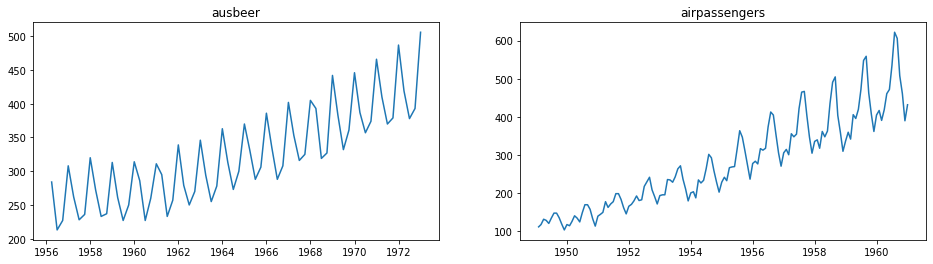

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_ts)
ax1.set_title('ausbeer')

ax2.plot(airpassengers_ts)
ax2.set_title('airpassengers')

From the graph above we can see the seasonal fluctuation of ausbeer is constant, and the seasonal fluctuation of the airpassengers is increase through out the years. Hence we are using additive method to extract seasonal, trend, and remainder components from ausbeer and multiplicative method to extract airpassengers components



Text(0.5, 1.0, 'airpassengers with log transformation')

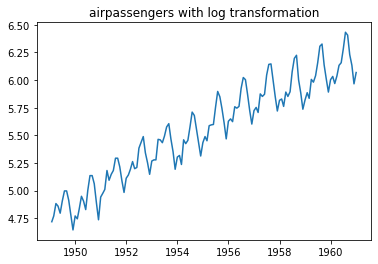

In [15]:
plt.plot(np.log(airpassengers_ts))
plt.title('airpassengers with log transformation')

However, We can still use additive method in multiplicative problem if we apply log transformation on dataset. The graph above shows the seasonal fluctuation become constant after the log transformation is applied.

$$  y_t = S_t \times T_t \times R_t \qquad \equiv \qquad log y_t = log S_t + log T_t + log R_t $$

## Trend Estimation

Trend of time series can be estimated using Moving Average (MA). MA calculate the averages of the different subsets across the dataset.

$$ M_t =  \frac{X_t + X_{t-1} + ... + X_{t-N+1}}{N}  $$


In [16]:
ausbeer_trend = ausbeer_ts.rolling(window=4).mean()

In [17]:
airpassengers_trend = airpassengers_ts.rolling(window=12).mean()

Text(0.5, 1.0, 'airpassengers trend')

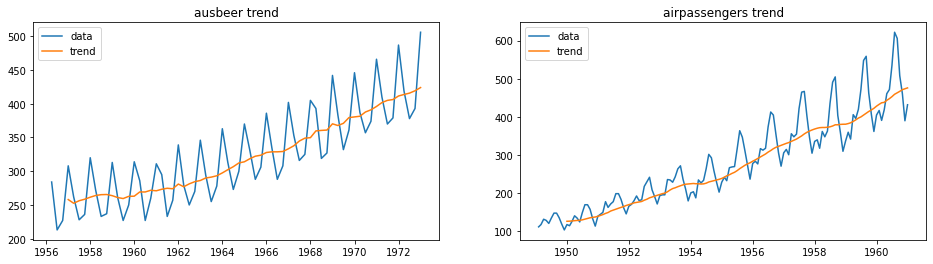

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_ts)
ax1.plot(ausbeer_trend)
ax1.legend(['data', 'trend'])
ax1.set_title('ausbeer trend')

ax2.plot(airpassengers_ts)
ax2.plot(airpassengers_trend)
ax2.legend(['data', 'trend'])
ax2.set_title('airpassengers trend')

## Detrend 

Detrend is the process of remove trend from the time series, a necessary step before estimating seasonality. Additive method detrend by reduce trend from data and multiplicative method detrend by divide the data with the trend.

Additive detrend, 
$$ y_t - T_t $$

Multiplicative detrend, 
$$ \frac{y_t}{T_t} $$

In [22]:
ausbeer_detrend = ausbeer_ts - ausbeer_trend
airpassengers_detrend = airpassengers_ts / airpassengers_trend

Text(0.5, 1.0, 'airpassengers detrend')

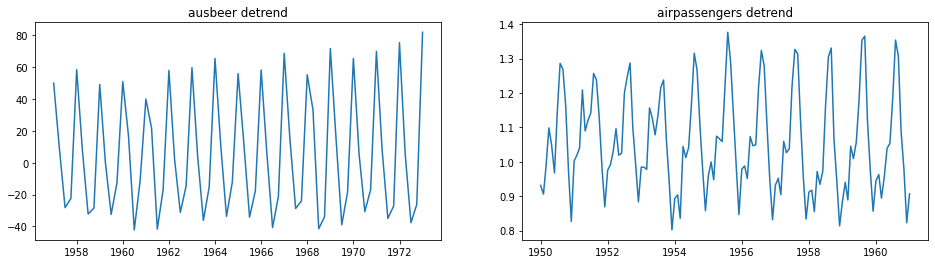

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_detrend)
ax1.set_title('ausbeer detrend')

ax2.plot(airpassengers_detrend)
ax2.set_title('airpassengers detrend')

## Seasonality Estimation

Seasonality is estimated by averaging the quarterly/monthly detrended data based on its period. the average of the seasonal will be use repeatedly to explain the seasonal variations of the time series.

In [49]:
ausbeer_detrend_reshape = ausbeer_detrend.values.reshape(-1, 4)
ausbeer_seasonal_mean = np.nanmean(ausbeer_detrend_reshape, axis=0)
ausbeer_seasonal = np.tile(ausbeer_seasonal_mean, 17)

In [50]:
airpassengers_detrend_reshape = airpassengers_detrend.values.reshape(-1, 12)
airpassengers_seasonal_mean = np.nanmean(airpassengers_detrend_reshape, axis=0)
airpassengers_seasonal = np.tile(airpassengers_seasonal_mean, 12)

Text(0.5, 1.0, 'Airpassenger seasonal')

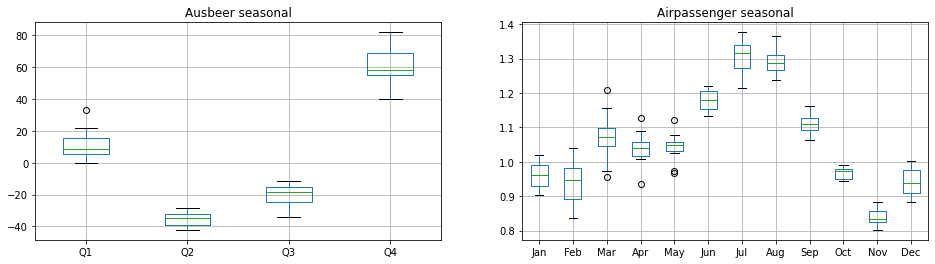

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

pd.DataFrame(ausbeer_detrend_reshape, columns=['Q1', 'Q2', 'Q3', 'Q4']).boxplot(ax=ax1) 
ax1.set_title('Ausbeer seasonal')

pd.DataFrame(airpassengers_detrend_reshape, 
             columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).boxplot(ax=ax2) 
ax2.set_title('Airpassenger seasonal')

Text(0.5, 1.0, 'airpassengers seasonal')

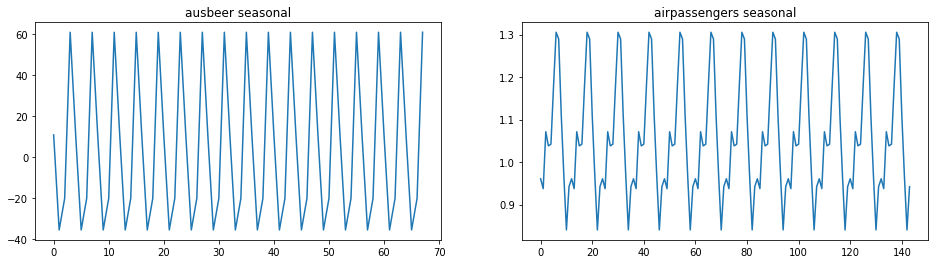

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_seasonal)
ax1.set_title('ausbeer seasonal')

ax2.plot(airpassengers_seasonal)
ax2.set_title('airpassengers seasonal')

## Remainder

Remainder is the left over after the estimation of seasonal and trend. Hence, for additive method, the remainder is calculated by reducing season and trend from raw data, and multiplicative method divide the raw data with multiplication of seasonal and trend. 

Additive residual,
$$ y_t - S_t - T_t $$

Multiplicative residual,

$$ \frac{y_t}{S_t \times T_t} $$

In [62]:
ausbeer_remainder = ausbeer_ts - ausbeer_trend - ausbeer_seasonal

In [63]:
airpassengers_remainder = airpassengers_ts / (airpassengers_trend * airpassengers_seasonal)

Text(0.5, 1.0, 'airpassengers remainder')

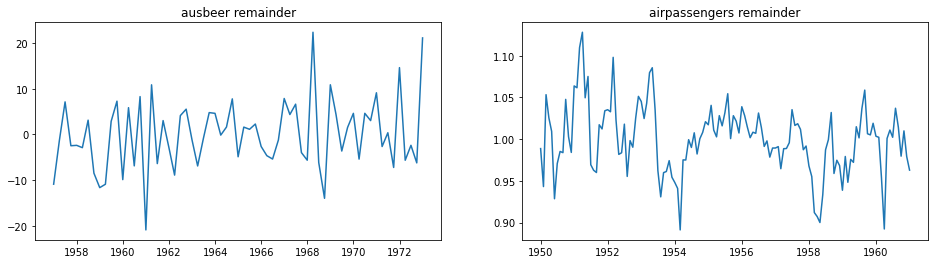

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_remainder)
ax1.set_title('ausbeer remainder')

ax2.plot(airpassengers_remainder)
ax2.set_title('airpassengers remainder')

## Reconstruct the Original Signal

In [68]:
ausbeer_reconstruct = ausbeer_trend + ausbeer_seasonal + ausbeer_remainder

In [67]:
airpassengers_reconstruct = airpassengers_trend * airpassengers_seasonal * airpassengers_remainder

Text(0.5, 1.0, 'airpassengers reconstruct')

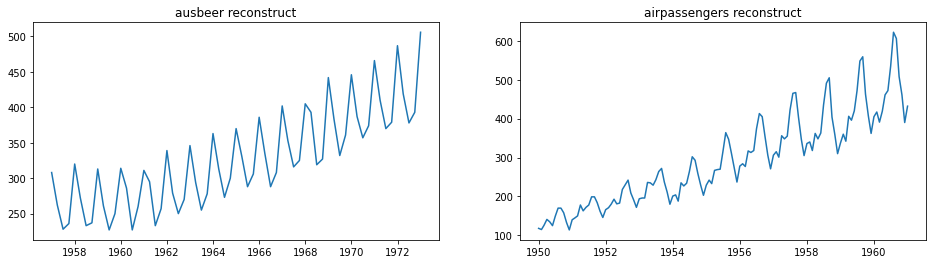

In [69]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 4))

ax1.plot(ausbeer_reconstruct)
ax1.set_title('ausbeer reconstruct')

ax2.plot(airpassengers_reconstruct)
ax2.set_title('airpassengers reconstruct')

# STL Decomposition

STL splits time series into seasonal, trend, and remainder component using LOESS(locally estimated scatterplot smoothing). [statsmodels.tsa][statsmodels] provide function for STL decomposition.

Key Parameters:
    
    period : {int, None}, optional
        Periodicity of the sequence.
    seasonal : int, optional
        Length of the seasonal smoother. Must be an odd integer, and should normally be >= 7 (default).
    trend : {int, None}, optional
        Length of the trend smoother. Must be an odd integer. 
        If not provided uses the smallest odd integer greater than 1.5 * period.
    low_pass : {int, None}, optional
        Length of the low-pass filter. Must be an odd integer >=3. If not provided, 
        uses the smallest odd integer > period.
    seasonal_deg : int, optional
        Degree of locally-fitted polynomial in seasonal LOESS. The value is 0 or 1.
    trend_deg : int, optional
        Degree of locally-fitted polynomial in trend LOESS. The value is 0 or 1.
    low_pass_deg : int, optional
        Degree of locally-fitted polynomial in low pass LOESS. The value is 0 or 1.
    robust : bool, optional
        Flag indicating whether to use a weighted version that is robust to some forms of outliers.

[statsmodels]: https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html

In [71]:
from statsmodels.tsa.seasonal import STL

plt.rc('figure',figsize=(16,12))

def plot_multiple_stl(stls, legend):
    base_fig = stls[0].plot()
    axs = base_fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    
    for stl in stls[1:]:   
        for ax, comp in zip(axs[1:], comps):
            series = getattr(stl, comp)
            if comp == 'resid':
                ax.plot(series, marker='o', linestyle='none')
            else:
                ax.plot(series)
                if comp == 'trend':
                    ax.legend(legend, frameon=False)

Example of STL decomposition on **nybirths** dataset. nybirths dataset is the number of births per month in New York city, from January 1946 to December 1959 (originally collected by Newton)

In [72]:
nybirths = pd.read_csv('./datasets/nybirths.csv', names=['value'], header=None)

In [73]:
nybirths_ts = pd.Series(nybirths['value'].values,
                        index=pd.date_range('1946', periods=len(nybirths), freq='M'))

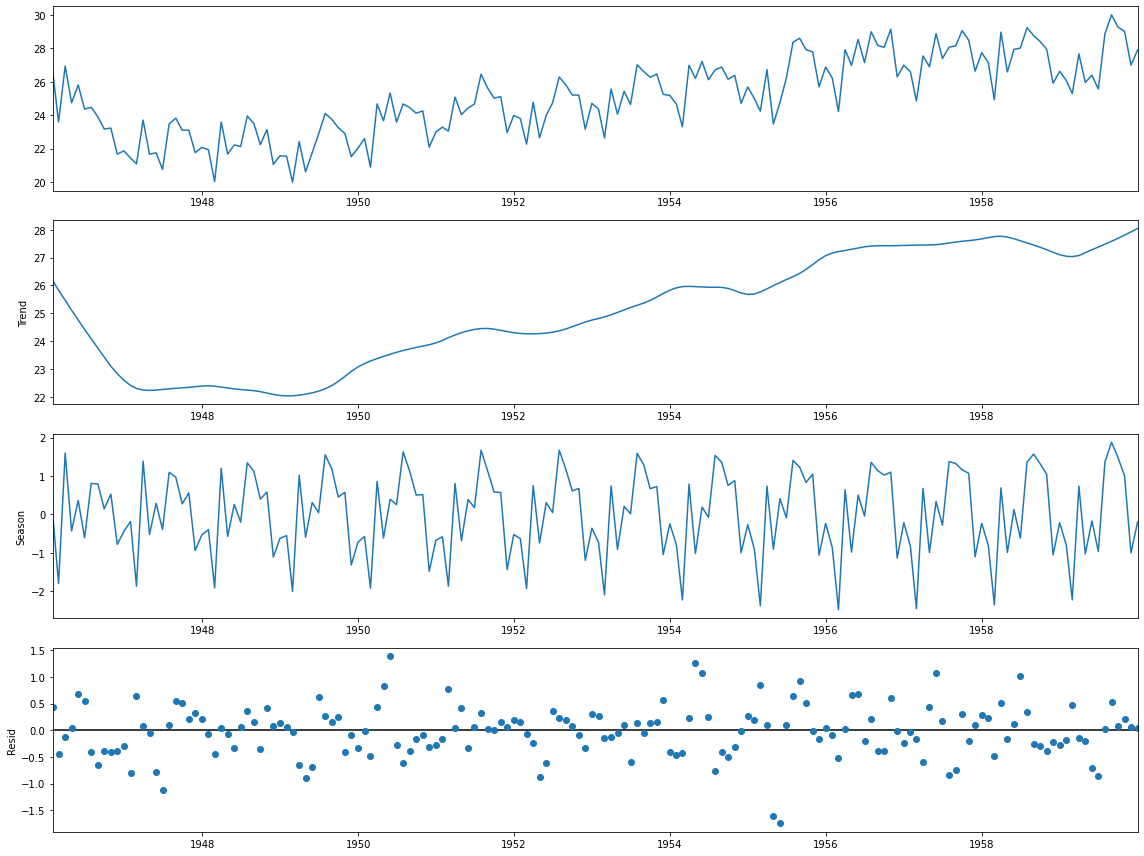

In [74]:
nybirths_stl = STL(nybirths_ts).fit()
nybirths_stl.plot()
plt.show()

### Robust Fitting

In [75]:
nybirths_stl_robust = STL(nybirths_ts, period=12, robust=True).fit()
nybirths_stl_robust_linear = STL(nybirths_ts, period=12, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True).fit()

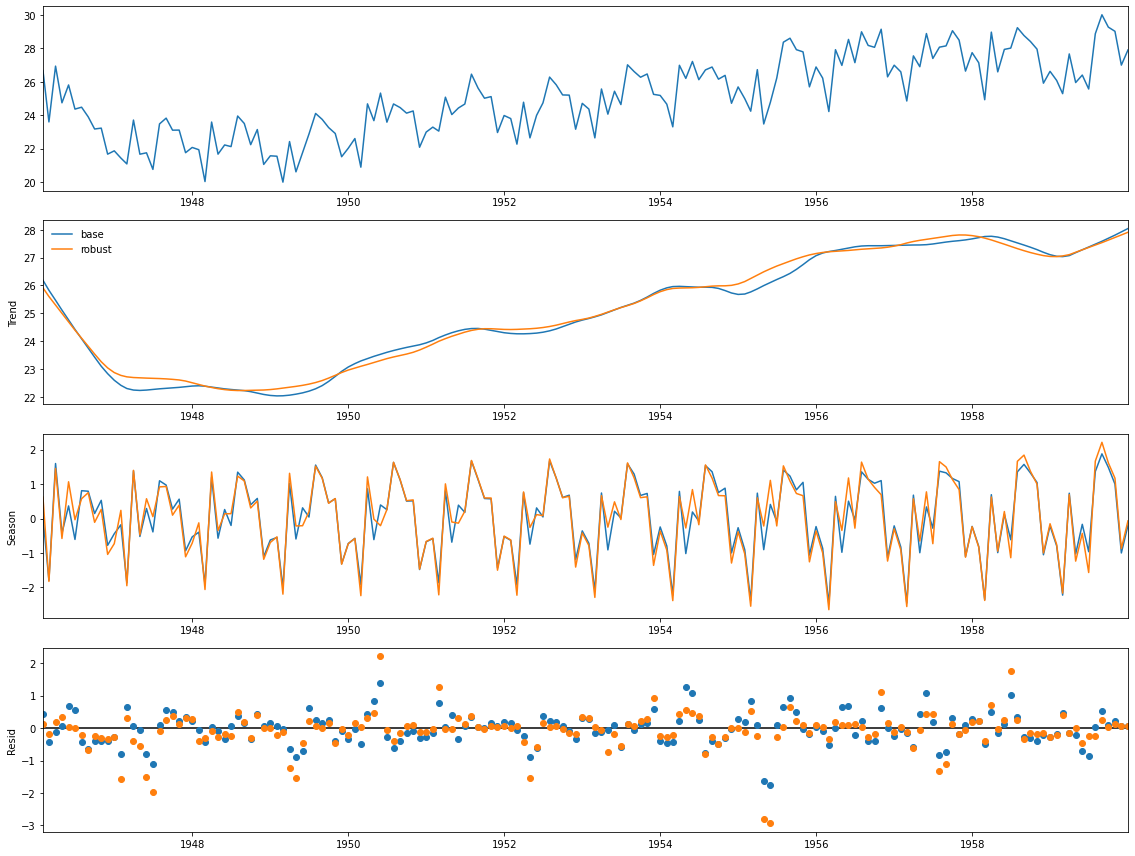

In [76]:
plot_multiple_stl([nybirths_stl, nybirths_stl_robust], ['base','robust'])

In [455]:
nybirths_stl_robust.weights

1946-01-31    0.979665
1946-02-28    0.958438
1946-03-31    0.957600
1946-04-30    0.867330
1946-05-31    0.996915
                ...   
1959-08-31    0.920602
1959-09-30    0.999569
1959-10-31    0.980731
1959-11-30    0.996566
1959-12-31    0.996117
Freq: M, Name: robust_weight, Length: 168, dtype: float64

In [456]:
nybirths_stl.weights

1946-01-31    1.0
1946-02-28    1.0
1946-03-31    1.0
1946-04-30    1.0
1946-05-31    1.0
             ... 
1959-08-31    1.0
1959-09-30    1.0
1959-10-31    1.0
1959-11-30    1.0
1959-12-31    1.0
Freq: M, Name: robust_weight, Length: 168, dtype: float64

### LOESS degree

In [81]:
from statsmodels.datasets import elec_equip as ds
elec_equip_ts = ds.load(as_pandas=True).data

In [84]:
elec_equip_stl = STL(elec_equip_ts).fit()
# elec_equip_stl_robust = STL(elec_equip_ts, period=12, robust=True).fit()
elec_equip_stl_robust_linear = STL(elec_equip_ts, period=12, seasonal_deg=0, trend_deg=0, low_pass_deg=0, robust=True).fit()

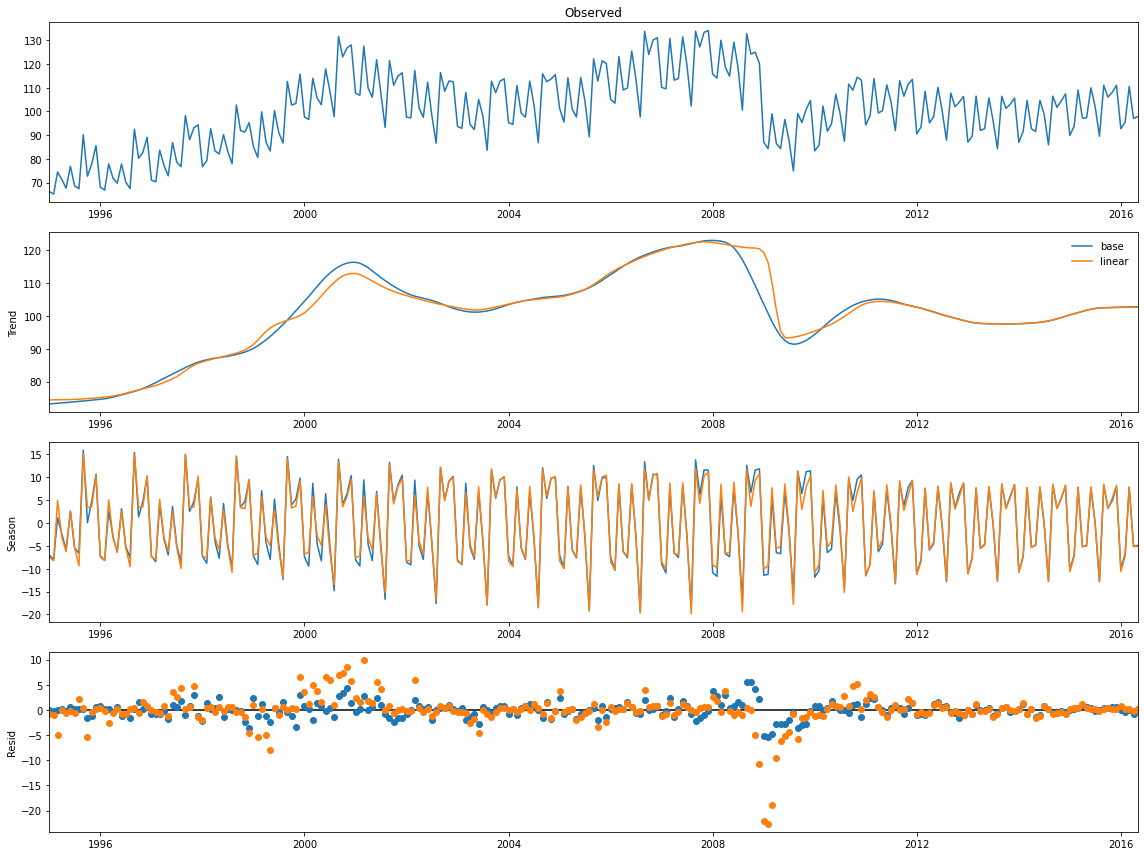

In [85]:
plot_multiple_stl([elec_equip_stl, elec_equip_stl_robust_linear], ['base','linear'])

## Measuring strength of trend and seasonality

The strength of trend and seasonality can be measure using the following method:

Measuring the strength of trend,
$$ F_T = max \bigg(0, 1 - \frac{Var(R_t)}{Var(T_t+R_t)} \bigg) $$

Measuring the strength of seasonality,
$$ F_S = max \bigg(0, 1 - \frac{Var(R_t)}{Var(S_t+R_t)} \bigg) $$

A time series dataset depicting the total number of female births recording in California, USA during the year of 1959.

In [109]:
female_birth = pd.read_csv('./datasets/daily-total-female-births.csv')

female_birth_ts = pd.Series(female_birth['Births'].values, index= pd.date_range('1959-01-01', periods = len(female_birth) , freq='D'))

Text(0.5, 1.0, 'Daily Total Female Births')

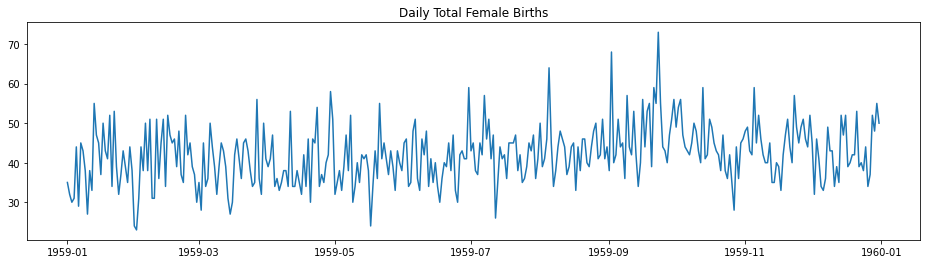

In [125]:
plt.rc('figure',figsize=(16,4))
plt.plot(female_birth_ts)
plt.title('Daily Total Female Births')

In [129]:
female_birth_tsl = STL(female_birth_ts).fit()

In [146]:
def get_seasonal_trend_strength(stl):
    trend_str = np.max([0, 1 - (np.var(stl.resid)/ np.var(stl.trend + stl.resid))])
    seasonal_str = np.max([0, 1 - (np.var(stl.resid)/ np.var(stl.seasonal + stl.resid))])
    return trend_str, seasonal_str
    

In [149]:
female_birth_trend_str, female_birth_seasonal_str = get_seasonal_trend_strength(female_birth_tsl)
print('strength of trend and seasonal: {} and {}'.format(female_birth_trend_str, female_birth_seasonal_str))

strength of trend and seasonal: 0.4573323560735212 and 0.4310605843462898


In [150]:
elec_trend_str, elec_seasonal_str = get_seasonal_trend_strength(elec_equip_stl)
print('strength of trend and seasonal: {} and {}'.format(elec_trend_str, elec_seasonal_str))

strength of trend and seasonal: 0.9862267284574736 and 0.9707324260847368
